In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import os
import sys
sys.path.append(f'{os.environ["HOME"]}/Projects/planckClusters/catalogs')
from load_catalogs import load_PSZcatalog
from astropy.io.fits import getheader
from matplotlib.ticker import PercentFormatter

In [2]:
# get file data
data = load_PSZcatalog()
data = data.sort_index(axis=1)

datapath = '../data_full'

In [3]:
exp_times = []
for name in data['NAME']:
    name = name.replace(' ', '_')

    # events image
    if os.path.isfile(f'{datapath}/{name}/{name}_img_50-600.fits'):
        evnts = f'{datapath}/{name}/{name}_img_50-600.fits'
    else:
        continue
        
    exp_times.append(getheader(evnts)['EXPOSURE'])
        

In [4]:
exp_times.sort()

<IPython.core.display.Javascript object>


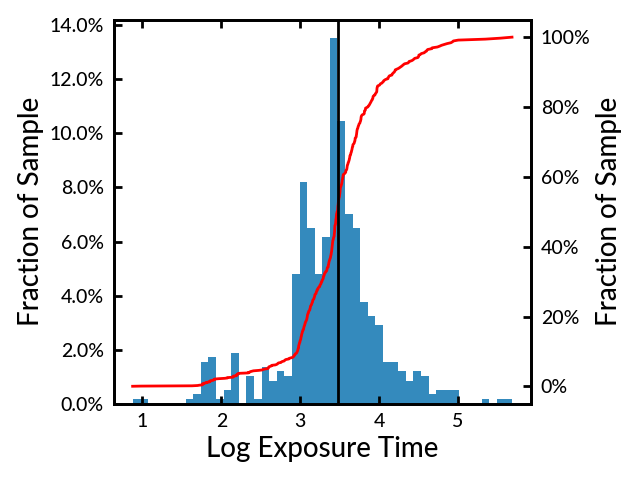

In [5]:


fig, ax1 = plt.subplots()

d = np.log10(exp_times)

ax1.hist(d, weights=np.ones(len(d)) / len(d), bins=50)
ax1.yaxis.set_major_formatter(PercentFormatter(1))

ax2 = ax1.twinx()
exp_dist = np.cumsum(d)
exp_dist_normed = exp_dist / exp_dist[-1]
ax2.plot(d, exp_dist_normed, color='red')
ax2.yaxis.set_major_formatter(PercentFormatter(1))

In [6]:
plt.axvline(np.log10(3000))

In [7]:
np.median(exp_times)

2698.442570816579

In [8]:
ax1.set_xlabel('Log Exposure Time')

Text(0.5, 0, 'Log Exposure Time')

In [9]:
ax1.set_ylabel('Fraction of Sample')

Text(0, 0.5, 'Fraction of Sample')

In [10]:
ax2.set_ylabel('Fraction of Sample')

Text(0, 0.5, 'Fraction of Sample')

In [11]:
plt.tight_layout()

In [ ]:
plt.savefig('exp_dist', bb)

In [10]:
plt.savefig('exp_dist.png')